Adam Peetz<br>
MSDS 650 Week 6<br>
Regis University<br>

### Wine Grouping and Fraud Detection with Unsupervised Learning. <br>

Wine is a major global commodity, representing billions of dollars of global trade. It also happens to be one of the most adulterated substances in the world. According to Solovyev et al (2021), wine fraud in the EU has a 2.3-billion-euro impact on trade revenue. Wine fraud comes in many forms; from the simple addition of chemical additives to manipulate its taste, up to the dilution/replacement of expensive wine types with cheaper ones. <br>
<br>
Wines have a specific chemical footprint that correlates to the parameters under which they were made. Gutiérrez-Escobar, Aliaño-González, and Cantos-Villar, (2021) noted:  <br>
<br>
"The quality of a wine is determined by the interaction of physicochemical properties such as alcoholic strength, residual sugar content, density, total acidity, volatile acidity and sulfites together with sensory properties such as aroma, flavor, astringency, bitterness, color, turbidity, or unpleasant odors. These parameters depend on intrinsic factors such as the grape variety and extrinsic ones including soil, weather and winemaking techniques"<br>
<br>
This unique footprint could be used as a method of fraud detection. Mislabeled or adulterated wines would show variances in their chemical profiles when compared to other wines from a vineyard because wines made with the same techniques and grown in the same place will have similar chemical profiles as noted by Gutiérrez-Escobar, Aliaño-González, and Cantos-Villar. <br>
<br>
The Wine Recognition Dataset is a collection of 13 chemical markers from 178 different bottles of wine collected by Forina, M. et al in 1991. These wines are reported to have come from 3 different Cultivators in Italy. These 178 wines will be grouped using an unsupervised learning technique, Kmeans, to show similarity (and detect possible fakes) using their chemical content. <br>


Text(0.5, 1.0, 'Representation of Vinyards in Dataset')

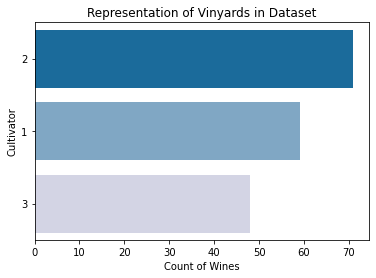

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

#import dataset
wine_df = pd.read_csv('assign2_wk6\wine_fraud.csv',delimiter=',')

#group by brand and count, sort for highest value
cultivatorgraph = wine_df.groupby('v0').count()
cultivatorgraph['Cultivator'] = ['1','2','3']
cultivatorgraph.sort_values(by='v1',inplace=True,ascending=False)

##Representation of wine makes in the dataset
sns.barplot(data=cultivatorgraph,x='v1',y='Cultivator',palette='PuBu_r')
plt.xlabel('Count of Wines')
plt.title('Representation of Vinyards in Dataset')

<b>EDA</b><br>
<b>Representation of Vineyards Barograph</b><br>
The largest producer of wine in the dataset is Cultivator 2 who has supplied measurements for 71 bottles of wine. Cultivators 1 and 3 have supplied 59 and 48 bottles of wine respectively. <br>
<br>
<b>EDA</b><br>
<b>Feature Correlation Heatmap:</b><br>
Feature v0 is the Cultivator. There is a strong correlation between the v0 Cultivator and the other features in the data set. The strength of this correlation is shown in the correlation heatmap below. Note all the bright colors corresponding to correlation in column v0 of the heatmap. This correlation supports the assertion by Gutiérrez-Escobar, Aliaño-González, and Cantos-Villar that chemical content is related to the cultivator.


Text(0.5, 1.0, 'Correlation of Features in Dataset')

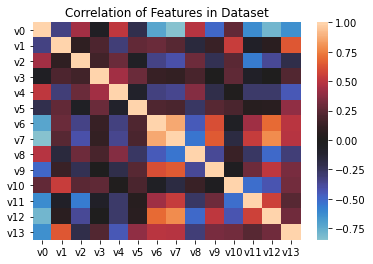

In [79]:
##Correlation Heatmap
plt.figure()
sns.heatmap(wine_df.corr(),center=0)
plt.title('Correlation of Features in Dataset')

<b>Requirement: Prepare Data for Clustering</b><br>
<br>
<b>Missing Values</b><br>
There are no missing/null values in the dataset. <br>
<br>

<b>Categorical/Numerical Treatment</b><br>
The only categorical feature in the dataset is v0 Cultivator. This feature, and all others, are already in a numerical format. If there were any features in the dataset that were categorical features, they would be converted to numerical features prior to the unsupervised learning attempt. Most machine learning algorithms need data to be presented in a numerical format for the comparison mathematics to successfully run on the features in the dataset. 
<br>

<b>Feature Scaling/Normalization</b><br>
Machine learning algorithms prefer numbers to be scaled for comparison. One place this comes into effect is when features in the dataset are recorded in different units, like feet and minutes. These different unit types cannot be accurately compared without conversion to a common scale. The other place this can affect a model is with a feature that has a huge range of values. A feature containing huge numbers in comparison to the rest of the features can be overweighted in the model. The way to overcome these challenges is to scale the features in the dataset. The process of scaling has been conducted on the features in the dataset to scale them using scikit learns minmaxscaler. The minmaxscaler process assigns a float value between 0 and 1 to each row corresponding to its value compared to all other values in that feature.  (Bownlee, 2019)
<br>


In [80]:
#create new DF to transforM
cleanwine_df = wine_df

In [81]:
#create scaler object
scaler = MinMaxScaler()

#scaler features:
#cleanwine_df['v0'] = scaler.fit_transform(cleanwine_df['v0'].values.reshape(-1,1))
cleanwine_df['v1'] = scaler.fit_transform(cleanwine_df['v1'].values.reshape(-1,1))
cleanwine_df['v2'] = scaler.fit_transform(cleanwine_df['v2'].values.reshape(-1,1))
cleanwine_df['v3'] = scaler.fit_transform(cleanwine_df['v3'].values.reshape(-1,1))
cleanwine_df['v4'] = scaler.fit_transform(cleanwine_df['v4'].values.reshape(-1,1))
cleanwine_df['v5'] = scaler.fit_transform(cleanwine_df['v5'].values.reshape(-1,1))
cleanwine_df['v6'] = scaler.fit_transform(cleanwine_df['v6'].values.reshape(-1,1))
cleanwine_df['v7'] = scaler.fit_transform(cleanwine_df['v7'].values.reshape(-1,1))
cleanwine_df['v8'] = scaler.fit_transform(cleanwine_df['v8'].values.reshape(-1,1))
cleanwine_df['v9'] = scaler.fit_transform(cleanwine_df['v9'].values.reshape(-1,1))
cleanwine_df['v10'] = scaler.fit_transform(cleanwine_df['v10'].values.reshape(-1,1))
cleanwine_df['v11'] = scaler.fit_transform(cleanwine_df['v11'].values.reshape(-1,1))
cleanwine_df['v12'] = scaler.fit_transform(cleanwine_df['v12'].values.reshape(-1,1))
cleanwine_df['v13'] = scaler.fit_transform(cleanwine_df['v13'].values.reshape(-1,1))

#rename columns to names from C Blake .names files
cleanwine_df.rename(columns={'v0':' Cultivator', 'v1':' Alcohol', 'v2':' Malic acid', 'v3':' Ash', 'v4':' Alcalinity of ash',\
                            'v5':' Magnesium', 'v6':' Total phenols', 'v7':' Flavanoids', 'v8':' Nonflavanoid phenols', \
                            'v9':' Proanthocyanins', 'v10':' Color intensity', 'v11':' Hue', 'v12':' OD280/OD315 of diluted wines',\
                            'v13':' Proline'\
                            }, inplace=True)

<b>Requirement: Use K-means to fit the data</b><br>
A K-means clustering algorithm works by randomly choosing K-number of centroids. It then evaluates the mean distance of points from those centroids and moves the centroids to those new center points. It continues this process by evaluating the mean distances from the new center points and continues moving the centroids until the change in means becomes insignificant over successive iterations of centroid movement. <br>
<br>
To conduct K-means clustering. The cleaned wine dataset is first broken into features and target labels, where the target labels are the Cultivators in this dataset. After the preloaded Cultivator data is removed, the Kmeans dataset can be fit to 3 clusters to attempt to match the wines to the labeled Cultivators. <br>



In [82]:
#Divide into features and targets
#Features
X = cleanwine_df.iloc[:,1:13]
#Targets
y = cleanwine_df.iloc[:,0]

In [83]:
#create 3 cluster kmeans classifier object using k-means++ starting centroid randomization patterns
Kmean = KMeans(n_clusters=3,init='k-means++')
#fit kmean classifier to X
Kmean.fit(X)

KMeans(n_clusters=3)

<b> Requirement: Discover any insights from this analysis? </b><br>

To understand the accuracy of the kmeans clustering, an adjusted_mutual_info_score from Sklearn can be used to compare predicted labels to the ground truth labels. (Pedregosa et al, 2021) According to the adjusted_mutual_info_score, the kmeans model correctly predicted the Cultivator labels about 76% of the time. <br>

<b>Adjusted Mutual Info Score:</b><br>
76%


In [84]:
#calulate adjusted mutual info score, using y real targets and the predicted kmean.labels
adjusted_mutual_info_score(y, Kmean.labels_)

0.7595085356961971

<b>Kmean.labels_</b><br>
The labels predicted by the clustering algorithm can be shown in an array using the .labels_ attribute. Due to the random selection of centroids, these labels will change every time the clustering operation is run. In the labels array you can see clusters with obvious interlopers. The first interruption to a cluster occurs at row 27 in the data, we will refer to this as bottle 27 and use it as an example for fraud detection. <br>
<br>


In [85]:
#show row labels given by kmeans
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

<b>Detecting Fakes with Unsupervised Learning</b><br>
It has been established that the chemical component of wine is specific enough that it can be used to tie bottles of wine to specific producers. In the case of our wine dataset, the k-means algorithm believes bottle 27 is more similar in chemical composition to wine produced by a second producer than the one the dataset claims it came from. If this dataset was 178 bottles of super expensive wine being purchased by a collector, we'd want to flag bottle 27 for further inspection. Did the winemaker apply a unique technique to that bottle? Is it a special year with grapes that ripened under unusual circumstances? Is it really just a 10$ bottle of Barefoot? 
 <br><br>
This array is a poor way to visualize the clustering of data and the Kmeans labeling for each row. The visualization of clusters in the dataset can be improved upon with the application of Principal Component Analysis.
 <br><br>
 <b>Requirement: Visualize the clusters using PCA</b><br>
Principal Component Analysis takes a high dimension dataset and decomposes it into as few variables as possible (or specified, 2 in this case). The resulting variables attempt to capture as much of the variation in the dataset as possible. The process of PCA has been used to decompose the Wine Dataset to 2 components, the components can be plotted in a scatterplot and colored with the Kmean.labels_ to show the clustering of the data in the set. As expected from a kmeans clustering operation, very smooth circular clusters have been created corresponding to groups of wine in the dataset.

Code for this visualization has been adapted from this week’s assignment notebook.


In [1]:
#create PCA array
#MSDS650
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)
#plot chart of PCA results with kmean labels
plt.figure()
ax2 = data_reduced.plot(kind='scatter', x=0, y=1, c=Kmean.labels_, cmap='rainbow')
ax2.legend()
plt.title('Projection of clustering using PCA')

NameError: name 'pca' is not defined

<b>Requirement: Visualize the clusters using PCA</b><br>
Another interesting graph can be created by including the Cultivator lables in the PCA dataset. Shown below, leaving the Cultivators in the PCA separates the clusters enough that the accuracy of the Kmean.labels_ can be shown against their ground truth labels. There is a clear mix up of wines from group 1 and group 3 in middle group 2. A few wines from group 2 are also allotted to group 1's wines by the kmeans clustering.


Text(0.5, 1.0, 'PCA - Predictions vs Ground Truth')

<Figure size 432x288 with 0 Axes>

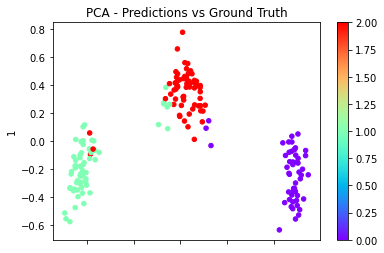

In [87]:
#create PCA array
#MSDS650
data_reduced = pca.fit_transform(cleanwine_df)
data_reduced = pd.DataFrame(data_reduced)
#plot chart of PCA results with kmean labels
plt.figure()
ax = data_reduced.plot(kind='scatter', x=0, y=1, c=Kmean.labels_, cmap='rainbow')
plt.title('PCA - Predictions vs Ground Truth')

# QDA (Just for Fun)

The literature included with the dataset by Forina, M. et al says Quadratic Discriminant Analysis can predict Cultivators with 99% accuracy. QDA attempts to fit data to n_classes (with SKLearn, the n_number is inferred from the training set), using a quadratic decision boundary. I want to test the assumption QDA can classify with 99% accuracy to see if there are any issues with the way I treated the features in my dataset. Using the QDA code below, 99% classification accuracy is achieved with the features and targets sets. The following model is built with code from the SKLearn documentation by Pedregosa et al. 2011.


In [88]:
#create QDA classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#create QDA object
clf = QuadraticDiscriminantAnalysis()
#fit QDA to train and test set
clf.fit(X, y)

QuadraticDiscriminantAnalysis()

In [89]:
#score QDA classifier
clf.score(X, y)

0.9943820224719101

In [90]:
#create prediction labels array for QDA classifier
predictions = clf.predict(X)

Text(0.5, 1.0, 'Projection of clustering using PCA')

<Figure size 432x288 with 0 Axes>

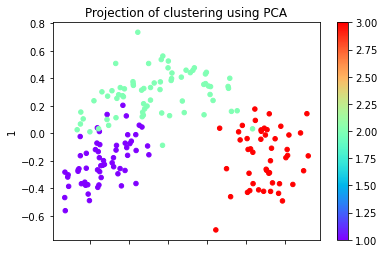

In [91]:
#Create PCA Array
#MSDS650
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)
#plot chart of QDA results on PCA
plt.figure()
ax3 = data_reduced.plot(kind='scatter', x=0, y=1, c=predictions, cmap='rainbow')
plt.title('Projection of clustering using PCA')

# References

Browlee, Jason PhD. 2019. <i>How to use Data Scaling Improve Deep Learning Model Stability and Performance.</i> retreived from MachineLearningMastery.com https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

Forina, M. et al, 1991. <i> Wine recognition data </i> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

Gutiérrez-Escobar, R., Aliaño-González, M. J., & Cantos-Villar, E. (2021). <i>Wine Polyphenol Content and Its Influence on Wine Quality and Properties: A Review. </i> Molecules (Basel, Switzerland), 26(3), 718. https://doi.org/10.3390/molecules26030718

Pedregosa et al. 2011. <i>Scikit-learn: Machine Learning in Python,</i>  JMLR 12, taken from scikit-learn.org

Solovyev et al. 2021. <i>NMR spectroscopy in wine authentication: An official control perspective</i> from Institute of Food Technology online library at https://ift.onlinelibrary.wiley.com/. link https://ift.onlinelibrary.wiley.com/doi/full/10.1111/1541-4337.12700